In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
from mesh_tools import trimesh_utils as tu
from python_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

# Load the appropriate volume data inferface object

In [4]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

# Data Prep: Loading mesh

In [197]:
np

[autoreload of cloudvolume.provenance failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/usr/local/lib/python3.8/dist-packages/cloudvolume/provenance.py", line 44, in <module>
    builder = pjs.ObjectBuilder(dataset_provenance_schema)
  File "/usr/local/lib/python3.8/dist-packages/python_jsonschema_objects/__init__.py", line 59, in __init__
    meta_validator = validatorClass(validatorClass.META_S

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_494/2136458744.py", line 1, in <module>
    np
NameError: name 'np' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1287, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/ultratb.py", line 1140, in structured_traceback
    formatted_exceptio

In [5]:
segment_id = 864691135510518224

In [6]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(154713, 3), faces.shape=(323535, 3))>

In [7]:
from python_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [8]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [9]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [10]:
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

xvfb-run -n 1083 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_45805.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_45805_decimated.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/decimation_meshlab_25838599.mls


In [11]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
  },
}



# Step 2: Soma Identification

In [12]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [13]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [14]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [15]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [ ]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 5280 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_88873.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_88873_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_759182.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_88873.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_88873_remove_interior.off
/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_759182.mls is being deleted....
There were 16 tot

In [ ]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

In [ ]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [ ]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

# Step 2b: Saving off pipeline products

In [ ]:
from python_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage")

# Step 3: Decomposition

In [21]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 25
empty_indices % = 0.0
 conflict_indices % = 0.010165121237665492


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Decomposing first pass: 2.916431188583374
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.528594970703125e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.6450881958007812e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.04030895233154297
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1483982.08022895  588135.81137922 1094821.63000965]
current_skeleton.shape = (556, 2, 3)
node_for_stitch = 556: [1483982.08022895  588135.81137922 1094821.63000965]
node_for_stitch AFTER = 556: [1483982.08022895  588135.81137922 1094821.63000965]
possible_node_loc = [  2 556]
possible_node_loc AFTER = [  2 556]
curr_shortest_path = [556]
Current stitch point was a branch or endpoi

  0%|          | 0/25 [00:00<?, ?it/s]

40338 40339
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1476534.   581771.6 1109552. ]
Time for preparing soma vertices and root: 0.0001590251922607422
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20030 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 12.11it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.23192667961120605
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 2074
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.002637462007987742


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 1.4778282642364502
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2091]
mesh_large_connectivity: 0.00011682510375976562
Finding MAP candidates connected components: 5.936622619628906e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.052546024322509766
Grouping MP Sublimbs by Graph: 0.021500349044799805
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0006649494171142578
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1535 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/pois

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.012726306915283203
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.325097322463989
Checking connected components after removing cycles
Total time for mesh KDTree = 0.022324085235595703
sbv[0].reshape(-1,3) = [[1476534.   581771.6 1109552. ]]
closest_sk_pt_coord BEFORE = [1476750.  582471. 1109370.]
current_skeleton.shape = (75, 2, 3)
node_for_stitch = 0: [1476750.  582471. 1109370.]
node_for_stitch AFTER = 0: [1476750.  582471. 1109370.]
possible_node_loc = [ 0 75]
possible_node_loc AFTER = [ 0 75]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1476750.  582471. 1109370.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[1476750.,  582471., 1109370.]])}
    Total time fo

0it [00:00, ?it/s]

Total time for decomposition = 0.930884838104248
mesh_correspondence_first_pass: 0.9309165477752686
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (75, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (75, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.14299378287900527
 conflict_indices % = 0.0


  0%|          | 0/5 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 8.585468053817749
correspondence_1_to_1: 0.15078115463256836
Total time for MAP sublimb processing 8.585540771484375
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.005060434341430664
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1481900.72163354  586937.6302398  1100472.34094648]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20358694833086333
 conflict_indices % = 0.009444625857175152


  0%|          | 0/129 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 16.455724954605103
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

39810 39811
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1474851.   571357.5 1113536. ]
Time for preparing soma vertices and root: 0.0001678466796875
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11304 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 14.10it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.25058817863464355
connecting at the root
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 1216
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0026850443032310034


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 0.667788028717041
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.744529724121094e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.07314538955688477
sbv[0].reshape(-1,3) = [[1474851.   571357.5 1113536. ]]
closest_sk_pt_coord BEFORE = [1478327.0746533   571496.39513115 1112568.79431172]
current_skeleton.shape = (816, 2, 3)
node_for_stitch = 79: [1478327.0746533   571496.39513115 1112568.79431172]
node_for_stitch AFTER = 79: [1478327.0746533   571496.39513115 1112568.79431172]
possible_node_loc = [  0 816]
possible_node_loc AFTER = [  0 816]
curr_shortest_path = [79, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20502645502645503
 conflict_indices % = 0.0


  0%|          | 0/50 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 87.38775118162019
curr_width_median = 443.7150414182957
curr_width_median = 382.57500092844
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 2.7897541522979736
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 3.744363307952881
Number of matching vertices = 18
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

22345 22346
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1493560.   586779.1 1105606. ]
Time for preparing soma vertices and root: 0.00016617774963378906
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10788 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 15.27it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.24018478393554688
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 741
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.5509340763092041
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [20742]
mesh_large_connectivity: 0.0001246929168701172
Finding MAP candidates connected components: 6.222724914550781e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.006819725036621094
Grouping MP Sublimbs by Graph: 2.5033950805664062e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.028733491897583008
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2754 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/pois

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.029989242553710938
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 16.35565423965454
Checking connected components after removing cycles
Total time for mesh KDTree = 0.1703624725341797
sbv[0].reshape(-1,3) = [[1493560.   586779.1 1105606. ]]
closest_sk_pt_coord BEFORE = [1492760.  587122. 1106680.]
current_skeleton.shape = (774, 2, 3)
node_for_stitch = 201: [1492760.  587122. 1106680.]
node_for_stitch AFTER = 201: [1492760.  587122. 1106680.]
possible_node_loc = [  0 124 135 147 174 201 315 417 584 596 600 630 743 774]
possible_node_loc AFTER = [  0 124 135 147 174 201 315 417 584 596 600 630 743 774]
curr_shortest_path = [201]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1492760.  587122. 1106680.]
skipping soma 0 because closest skeleton node 

  0%|          | 0/9 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (713, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 17.20860743522644
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7764 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_14954.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_14954_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_104666.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_14954.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron

0it [00:00, ?it/s]

Total time for decomposition = 3.456727981567383
mesh_correspondence_first_pass: 3.4567582607269287
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (713, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (713, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.1691736573136631
 conflict_indices % = 0.052068267283772056


  0%|          | 0/56 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 22.354944467544556
correspondence_1_to_1: 1.6608147621154785
Total time for MAP sublimb processing 22.355003595352173
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 23.16880226135254
Number of matching vertices = 60
Number of matching vertices = 13
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/7 [00:00<?, ?it/s]

20741 20742
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1486653.   594244.2 1104480. ]
Time for preparing soma vertices and root: 0.0001704692840576172
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9843 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 17.49it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.22526788711547852
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 818
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.5219707489013672
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.8848648071289062e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.4781951904296875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.14623236656188965
sbv[0].reshape(-1,3) = [[1486653.   594244.2 1104480. ]]
closest_sk_pt_coord BEFORE = [1486547.7606223   594609.92820407 1104601.87572914]
current_skeleton.shape = (817, 2, 3)
node_for_stitch = 817: [1486547.7606223   594609.92820407 1104601.87572914]
node_for_stitch AFTER = 817: [1486547.7606223   594609.92820407 1104601.87572914]
possible_node_loc = [334 817]
possible_node_loc AFTER = [334 817]
curr_shortest_path = [817]
Current stitch point was a branch or endp

  0%|          | 0/1 [00:00<?, ?it/s]

19361 19362
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1491272.  582425. 1102199.]
Time for preparing soma vertices and root: 0.00018930435180664062
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7350 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 19.24it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1845407485961914
connecting at the root
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 734
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.43975067138671875
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.100799560546875e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2172927856445312e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.12228083610534668
sbv[0].reshape(-1,3) = [[1491272.  582425. 1102199.]]
closest_sk_pt_coord BEFORE = [1491378.93502276  582020.70946596 1101822.28585048]
current_skeleton.shape = (733, 2, 3)
node_for_stitch = 1: [1491378.93502276  582020.70946596 1101822.28585048]
node_for_stitch AFTER = 1: [1491378.93502276  582020.70946596 1101822.28585048]
possible_node_loc = [  0 708]
possible_node_loc AFTER = [  0 708]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endpoint

  0%|          | 0/1 [00:00<?, ?it/s]

14575 14576
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 7 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1468936.   574693.8 1112623. ]
Time for preparing soma vertices and root: 0.0002522468566894531
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2055 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 41.82it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11821889877319336
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 117
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.1525423526763916
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [3349]
mesh_large_connectivity: 0.00010442733764648438
Finding MAP candidates connected components: 4.601478576660156e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0016248226165771484
Grouping MP Sublimbs by Graph: 1.9550323486328125e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.013872146606445312
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 270 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/pois

0it [00:00, ?it/s]

len(leftover_meshes_sig) = [<trimesh.Trimesh(vertices.shape=(892, 3), faces.shape=(1350, 3))>, <trimesh.Trimesh(vertices.shape=(662, 3), faces.shape=(1078, 3))>]


  0%|          | 0/2 [00:00<?, ?it/s]

invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/891 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 62.97it/s]

Time for sk_meshparty_obj = 0.040838003158569336
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 76
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [4400.58628296]
width_median= 4400.58628295601
Time for correspondence = 0.06472063064575195
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/661 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 51.37it/s]

Time for sk_meshparty_obj = 0.04315519332885742
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 57
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
Time for correspondence = 0.08063125610351562
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.06680536270141602
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.592318296432495
Checking connected components after removing cycles
Total time for mesh KDTree = 0.018558740615844727
sbv[0].reshape(-1,3) = [[1468936.   574693.8 1112623. ]]
closest_sk_pt_coord BEFORE = [1467366.30595274  578509.84736969 1112376.30613502]
current_skeleton.shape = (135, 2, 3)
node_for_stitch = 70: [1467366.30595274  578509.84736969 1112376.30613502]
node_for_stitch AFTER = 70: [1467366.30595274  578509.84736969 1112376.30613502]
possible_node_loc = [  0 133 135]
possible_node_loc AFTER = [  0 133 135]
curr_shortest_path = [70, 42.0, 41.0, 40.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0]
Current stitch point was not a branch or endpoint, shortest_path_length to on

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (114, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 10.843826532363892
Working on limb correspondence for #0 MAP piece
xvfb-run -n 706 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_69568.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_69568_remove_interior.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/remove_interior_746123.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron_69568.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/temp/neuron

0it [00:00, ?it/s]

Total time for decomposition = 1.1296892166137695
mesh_correspondence_first_pass: 1.1297283172607422
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (114, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (114, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.14601373544341595
 conflict_indices % = 0.19617796357121528


  0%|          | 0/5 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.293514490127563
correspondence_1_to_1: 0.3060731887817383
Total time for MAP sublimb processing 12.293577432632446
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 12.569897651672363
Number of matching vertices = 90
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

3348 3349
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 97.13153862953186


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(113, 3), faces.shape=(176, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.0067901611328125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 81.52it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.029496431350708008
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [401.12278507]
width_median= 401.1227850659981
segment_widths_median = [401.12278507]
Decomposing first pass: 0.04164719581604004
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.075599670410156e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.4080276489257812e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07245969772338867


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13165664672851562
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(140, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 4.76837158203125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 69.75it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.027939319610595703
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 24
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [159.98961537]
width_median= 159.98961536716592
segment_widths_median = [159.98961537]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 97.43it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0575556755065918
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 34
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [159.98783275]
width_median= 159.9878327481756
segment_widths_median = [159.98783275]
Using the axon parameters
Decomposing first pass: 0.0481572151184082
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.7894973754882812e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1696090698242188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1359694004058838
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

139 140
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.23587441444396973
Total time for stitching floating pieces = 2.418975591659546
Total time for Concept Networks = 1.67750883102417
Total time for all mesh and skeletonization decomp = 101.22858715057373
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 8005 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_523372.off -o /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_523372_poisson.off -s /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/poisson_472650.mls
removed temporary input file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_523372.off
removed temporary output file: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/Poisson_temp/neuron_523372_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applicat

setting the edge length by absolute length
min_edge_length AFTER = 75
max_triangle_angle AFTER = 1.91986
quality_speed_tradeoff AFTER = 0.2
set_medially_centered_speed_tradeoff AFTER = 0.2
medial centered AFTER 1
AREA VARIATION AFTER 0.0001
MAX ITERATIONS AFTER 500
medial centered END 1
set_medially_centered_speed_tradeoff END = 0.2
quality_speed_tradeoff END = 0.2
Max iterations END = 500
AREA VARIATION END 0.0001
Number of vertices of the skeleton: 76
Number of edges of the skeleton: 75
MAX ITERATIONS initially 500
AREA VARIATION initially 0.0001
medial centered initially 1
medially_centered_speed_tradeoff initially 0.2
quality_speed_tradeoff initially 0.1
max_triangle_angle initially 1.91986
min_edge_length initially 130.059
setting the edge length by absolute length
min_edge_length AFTER = 75
max_triangle_angle AFTER = 1.91986
quality_speed_tradeoff AFTER = 0.2
set_medially_centered_speed_tradeoff AFTER = 0.2
medial centered AFTER 1
AREA VARIATION AFTER 0.0001
MAX ITERATIONS AFTER 

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 102



  0%|          | 0/102 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 100



  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 82



  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 186



  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 38



  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 149



  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 155



  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/155 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 109



  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 52



  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 78



  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 134



  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 120



  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 6
    No spines and using precomputed width: 630.2784498341566
Working on limb L0 branch 3
    current_width= 413.74918729790517
Working on limb L0 branch 7
    No spines and using precomputed width: 379.0361128994382
Working on limb L0 branch 0
    current_width= 264.9952831459003
Working on limb L0 branch 1
    current_width= 271.25307888688695
Working on limb L0 branch 2
    current_width= 290.06918856380514
Working on limb L0 branch 4
    current_width= 296.6207081305331
Working on limb L0 branch 8
    No spines and using precomputed width: 307.3302495420711
Working on limb L0 branch 5
    current_width= 231.6235017904683
Working on limb

In [22]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [23]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules(verbose = False)

In [24]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [25]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.shape=(727, 3))>, <trimesh.Trimesh(ve

# Saving off neuron

In [50]:
from neurd import neuron_utils as nru

filepath = nru.save_compressed_neuron(
    neuron_obj,
    output_folder = "./",
    file_name = f"{segment_id}",
    return_file_path = True,
)

Total time for soma meshes compression = 0.17049574851989746
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.23262834548950195
Total time for limb_meshes compression = 0.48692774772644043
    Starting Limb Correspondence Compression


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 2.686476707458496
Total time for compression = 4.050966262817383


---Finished outputing neuron at location: /neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/123---


# Reloading the Neuron

In [51]:
neuron_obj_rec = nru.decompress_neuron(
    filepath = f"./{segment_id}",
    original_mesh = mesh_decimated,
    #pipeline_products = pipeline_products,
)

Decompressing Neuron in minimal output mode...please wait


In [52]:
print(neuron_obj_rec.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.shape=(727, 3))>, <trimesh.Trimesh(ve

# Step 4A: Multi Soma Split Suggestions

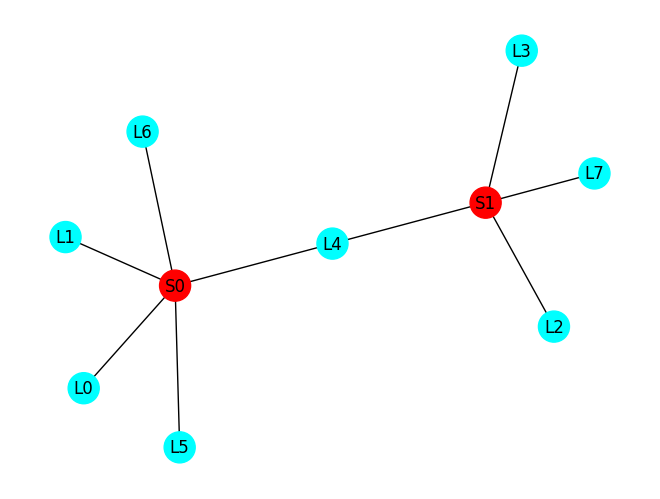

In [53]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [54]:
multi_soma_split_parameters = dict()

In [55]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [56]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

n_paths_multi_soma = 1
n_paths_multi_touch = 0
n_paths_cut = 1


-------- Suggestions for Limb 4------


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Step 4B: Multi Soma Split Execution

In [62]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

In [63]:
nobj_1 = neuron_list[0]
print(nobj_1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.shape=(727, 3))>, <trimesh.Trimesh(ve

# Step 5: Cell Typing

In [132]:
from neurd import neuron_pipeline_utils as npu

In [172]:
segment_id

123

In [173]:
n1 = neuron_list[0]
mesh_decimated

<trimesh.Trimesh(vertices.shape=(154713, 3), faces.shape=(323535, 3))>

In [175]:
nviz.visualize_neuron(
    n1,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [176]:
synapse_filepath = '/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691135510518224_synapses.csv'

vdi.set_synapse_filepath(
    synapse_filepath
)

In [179]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.5636334419250488
branches_touching_root = [13]
combining close nodes
combine_threshold = 1300
length of Graph = 7906
After combining close endpoints max(kept_branches_idx) = 85, len(kept_branches_idx) = 75
empty_indices % = 0.0
 conflict_indices % = 0.028463139120095123
Decomposing first pass: 4.527435064315796
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 8.344650268554688e-06
Total time for MAP sublimb processing 4.5299530029296875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.044293880462646484
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1484209.07018222  588125.41800575 1095073.94391184]
cu

100%|██████████| 1/1 [00:00<00:00, 286.11it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02121567726135254
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 20
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
Decomposing first pass: 0.030910253524780273
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.9141387939453125e-06
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.33514404296875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.05292963981628418
Removed 0 skeletal branches
175 176
For marked faces: None
empty_indices % = 0.0
 

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1015021800994873
concept_network_dict = {0: [<python_tools.networkx_utils.GraphOrderedEdges object at 0x7fb6449d2a30>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1484351.   588129.9 1095200. ]---------
Starting_edge inside branches_to_conept = [[1467806.   619005.5 1081192. ]
 [1484351.   588129.9 1095200. ]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [59]
printing out current edge:
[[1484351.   588129.9 1095200. ]
 [1467806.   619005.5 1081192. ]]
edge_endpoints_to_process was empty so exiting loop after 76 iterations
starting_node in concept map (that should match the starting edge) = 53
Total time for branches to concept conversion = 0.37469053268432617

Done generating concept network 



Number of segments: 16


Number of segments: 11


Number of segments: 12


Number of segments: 9


Number of segments: 3


Number of segments: 6


Number of segments: 3


N

In [77]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 0.8780864319672531
syn_density_head = 0.3778650629367278
syn_density_neck = 0.007197429770223387
syn_density_shaft = 0.3958586373622862
sk_length_synapse_density = 555753.946575272
About to do spine_density stats
postsyn_limb_branch = {'L0': array([0, 1, 3, 4, 5, 9]), 'L2': array([4]), 'L3': array([0]), 'L4': array([0])}
sk_length = 525107.9917640581
# of spines = 260
Density = 0.49513624640628845
spine_density = 0.49513624640628845 (multiplier = 1000)
sk_length spine density = 525107.9917640581
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = excitatory, pred_class_label = excitatory
Total time for e/i calculations = 0.07155132293701172
baylor_e_i = excitatory

*****Using v7 Filters!!!


Current node skip distance was 1519.343930041573 but max skip distance was 1519.343930041573
Current node skip d

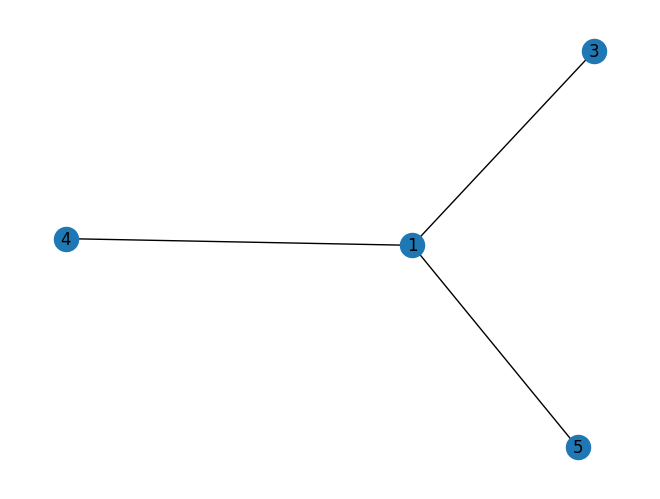

Performing global features query
Done with edge_df: 0.0006356239318847656
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
   u  v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  1  3     18.23    7.006226               0.095976              0.000009   
1  1  4     51.52   28.619013               0.392042              0.000194   
2  1  5     38.18   27.008424               0.270062              0.000038   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                2                       None                          None  
2                1                       None                          None  
Afer Global query: 
   u  v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  1  3     18.23    7.006226               0.095976              0.000009   


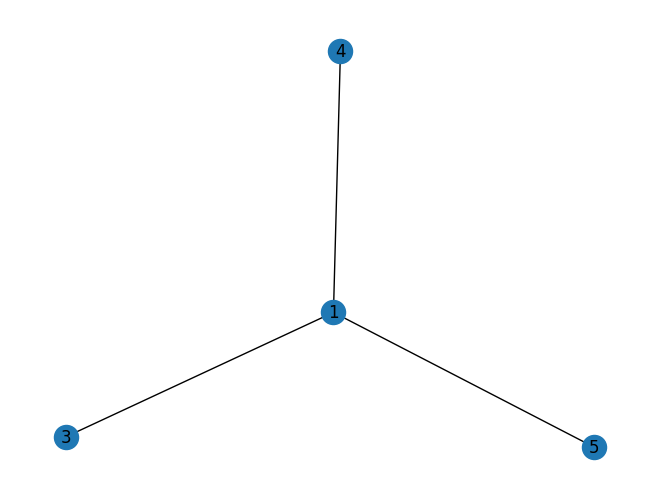

Performing node features query
Done with edge_df: 0.0009584426879882812
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
   u  v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  1  3     18.23    7.006226               0.095976              0.000009   
1  1  4     51.52   28.619013               0.392042              0.000194   
2  1  5     38.18   27.008424               0.270062              0.000038   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                2                       None                          None   
2                1                       None                          None   

  above_threshold_delete  
0                   None  
1                   True  
2                   None  
Afer Node query: 
   u  v  sk_angle  width_diff  width_diff_percent

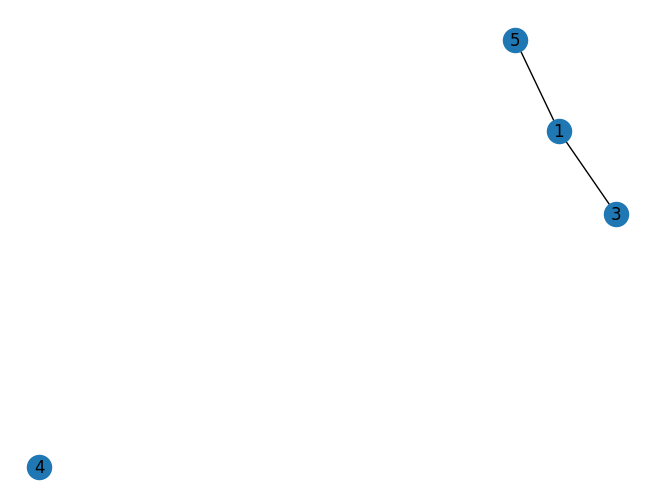

for upstream node 5, winning_node = None, error_branches = [1 3 4]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1433.3560022556676 but max skip distance was 1433.3560022556676
Current node skip distance was 1430.4806768165622 but max skip distance was 1430.4806768165622
Current node skip distance was 1395.1715386565604 but max skip distance was 1395.1715386565604
Current node skip distance was 1746.63661976179 but max skip distance was 1746.63661976179
Current node skip distance was 1466.6820609466095 but max skip distance was 1466.6820609466095
Current node skip distance was 1419.1567072051882 but max skip distance was 1923.9180300989
Current node skip distance was 1419.1157734842918 but max skip distance was 1419.1157734842918
Current node skip distance was 1386.0051763815936 but max skip distance was 1386.0051763815936
Current node skip distance was 1545.595763467836 but max skip distance was 1652.12612659233

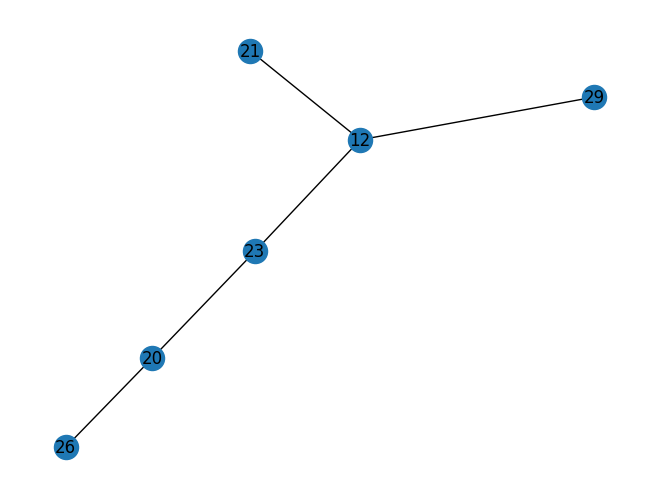

Performing global features query
Done with edge_df: 0.0006215572357177734
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  12  21     52.72   30.497361               0.503277                   0.0   
1  12  23     57.20    1.161105               0.019161                   0.0   
2  12  29     34.74   10.451040               0.172466                   0.0   
3  23  20     53.63   43.797190               0.414919                   0.0   
4  26  20     14.73    1.240222               0.011749                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3       

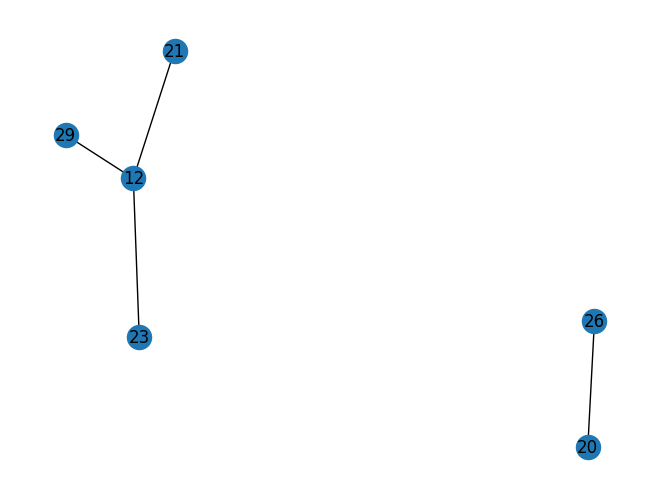

Performing node features query
Done with edge_df: 0.0007996559143066406
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  12  21     52.72   30.497361               0.503277                   0.0   
1  12  23     57.20    1.161105               0.019161                   0.0   
2  12  29     34.74   10.451040               0.172466                   0.0   
3  26  20     14.73    1.240222               0.011749                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3                0                      False                         False   

  above_

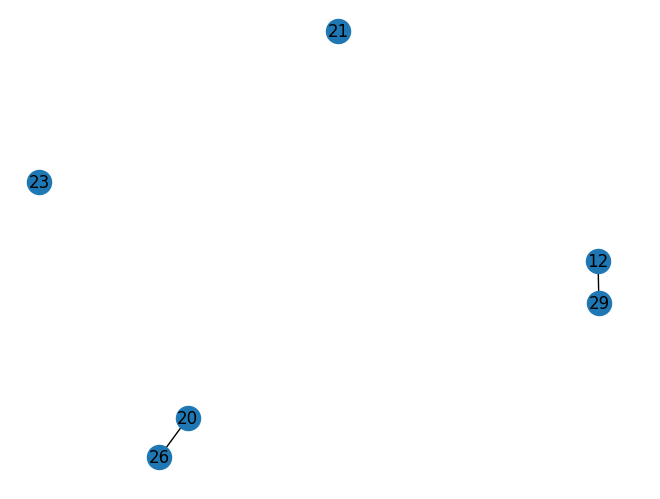

for upstream node 20, winning_node = 26, error_branches = [12 21 23 29]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1546.2290435708915 but max skip distance was 1546.2290435708915
Current node skip distance was 1489.1567938332191 but max skip distance was 1489.1567938332191
Current node skip distance was 1423.9946428663225 but max skip distance was 1423.9946428663225
Current node skip distance was 1809.0584379151333 but max skip distance was 1850.2864660348337
Current node skip distance was 1850.2864660348337 but max skip distance was 1850.2864660348337
Current node skip distance was 1611.6505289229938 but max skip distance was 1611.6505289229938
Current node skip distance was 1551.6937888199488 but max skip distance was 1551.6937888199488
Current node skip distance was 1719.0736127242612 but max skip distance was 1809.0584379151333
branch_match_query = :
(((width_diff < 75) or (width_diff_percent

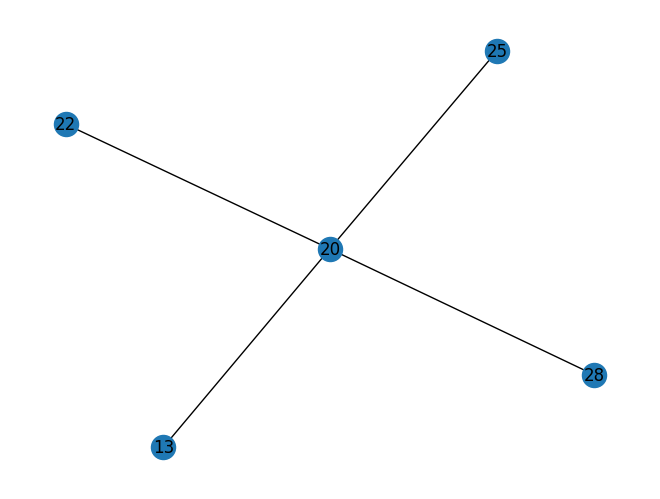

Performing global features query
Done with edge_df: 0.0008623600006103516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  13  20     20.72   44.968119               0.742198                   0.0   
1  20  22     27.54   28.158274               0.266762                   0.0   
2  20  25     63.33   58.512847               0.554330                   0.0   
3  20  28     13.50   27.021762               0.203818                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

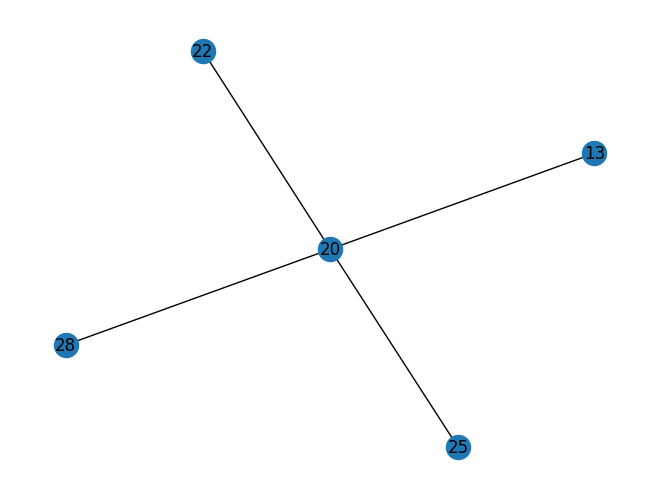

Performing node features query
Done with edge_df: 0.0007410049438476562
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  13  20     20.72   44.968119               0.742198                   0.0   
1  20  22     27.54   28.158274               0.266762                   0.0   
2  20  25     63.33   58.512847               0.554330                   0.0   
3  20  28     13.50   27.021762               0.203818                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

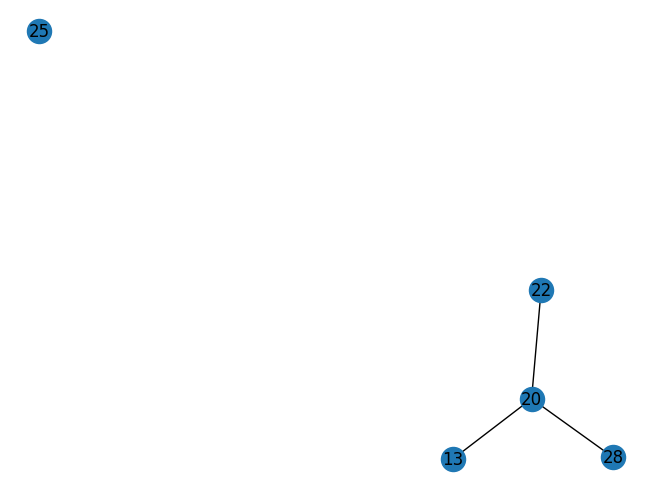

for upstream node 28, winning_node = None, error_branches = [13 20 22 25]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1462.702705562729 but max skip distance was 1462.702705562729
Current node skip distance was 1826.2385344561253 but max skip distance was 1826.2385344561253
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008018016815185547
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   48.249806               0.346640              0.000082   
1  10  28     47.78    6.615122               0.047525              0.000000   
2  10  30     91.23   19.104460               0.120687              0.000000   
3  16

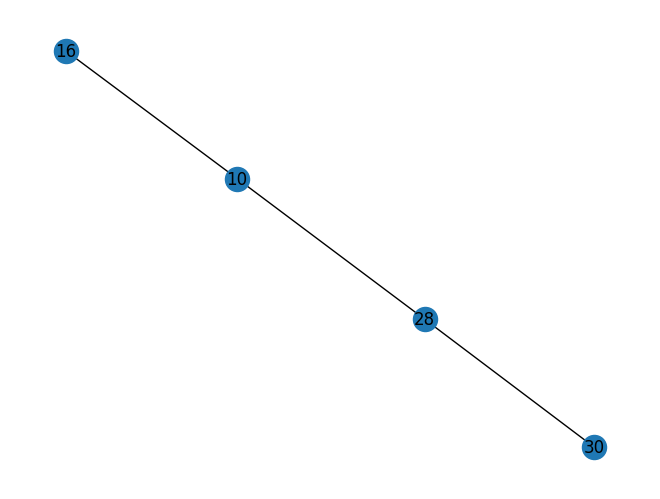

Performing global features query
Done with edge_df: 0.0005822181701660156
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   48.249806               0.346640              0.000082   
1  10  28     47.78    6.615122               0.047525              0.000000   
2  28  30     43.46   25.719581               0.162476              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                9                      False                          None  
1                0                       True                          None  
2                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   48.249806               0.346640              

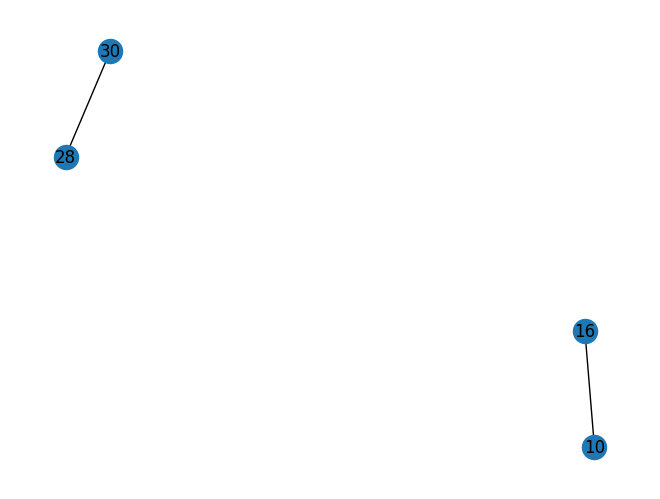

Performing node features query
Done with edge_df: 0.0006873607635498047
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   48.249806               0.346640              0.000082   
1  28  30     43.46   25.719581               0.162476              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                9                      False                          None   
1                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   48.249806               0.346640              0.000082   
1  28  30     43.46   25.719581               0.162476             

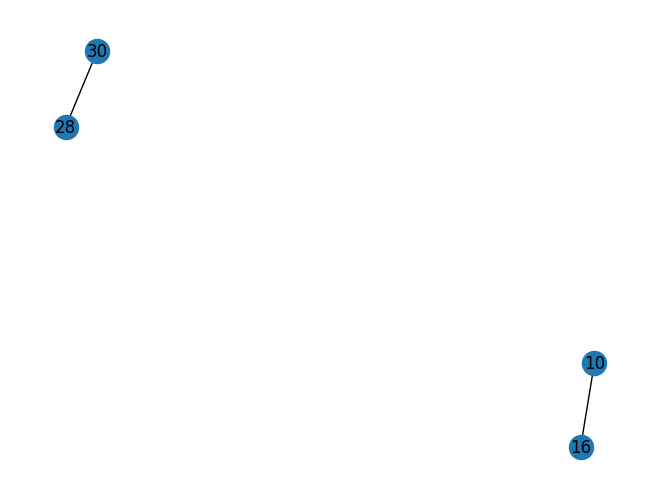

for upstream node 30, winning_node = 28, error_branches = [10 16]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (132.57766705382286) less than width_min(250)
Current node skip distance was 1502.8179992499754 but max skip distance was 1502.8179992499754
Current node skip distance was 1523.7884501972999 but max skip distance was 1531.943190281531
Current node skip distance was 1608.7992850545759 but max skip distance was 1826.2385344561253
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007669925689697266
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  30     77.08   65.890739               0.713053                   0.0   
1  27  32     25.52    6.697281               0

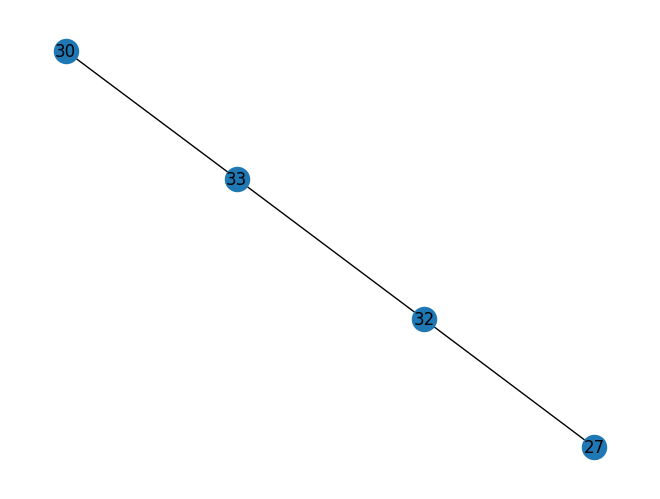

Performing global features query
Done with edge_df: 0.0005862712860107422
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  32     25.52    6.697281               0.072476                   0.0   
1  30  33     47.52   52.185420               0.491796                   0.0   
2  32  33     12.61   20.402600               0.192275                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  32     25.52    6.697281               0.072476              

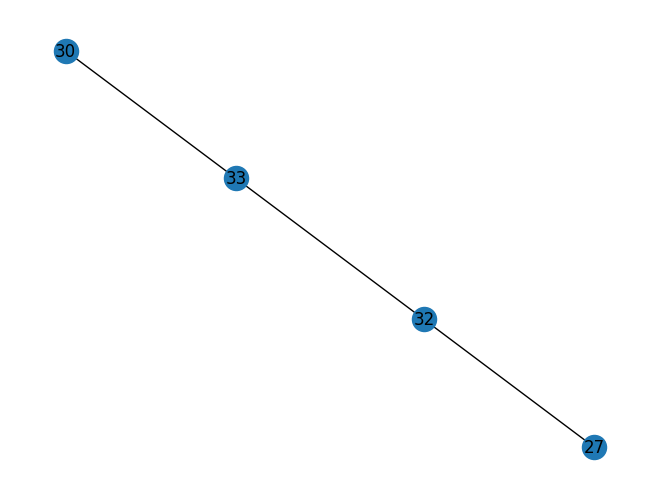

Performing node features query
Done with edge_df: 0.0005924701690673828
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  32     25.52    6.697281               0.072476                   0.0   
1  30  33     47.52   52.185420               0.491796                   0.0   
2  32  33     12.61   20.402600               0.192275                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   True  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_di

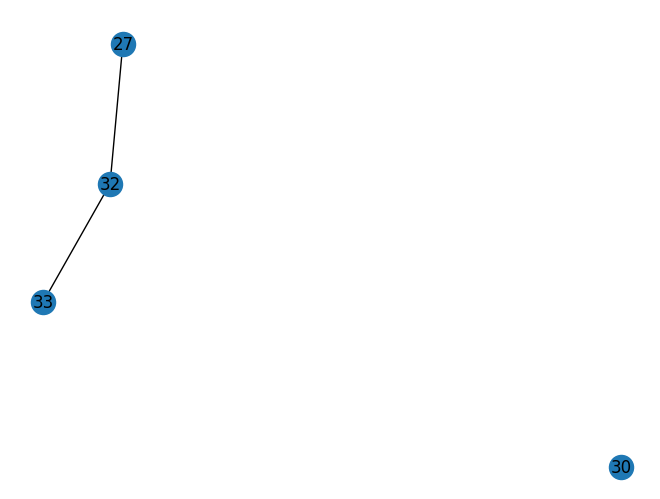

for upstream node 33, winning_node = None, error_branches = [27 30 32]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1744.659214242252 but max skip distance was 1744.659214242252
Current node skip distance was 1531.943190281531 but max skip distance was 1531.943190281531
Current node skip distance was 1444.8699834408342 but max skip distance was 1608.7992850545759
Current node skip distance was 1430.495890861237 but max skip distance was 1676.6593961423819
Current node skip distance was 1488.2050338527479 but max skip distance was 1488.2050338527479
Current node skip distance was 1438.787336903817 but max skip distance was 1438.787336903817
Current node skip distance was 1701.1800011959722 but max skip distance was 1744.659214242252
Current node skip distance was 1459.4197789215646 but max skip distance was 2141.3451010899726
Current node skip distance was 1903.2530417833777 but max skip distance was 1903.2530417

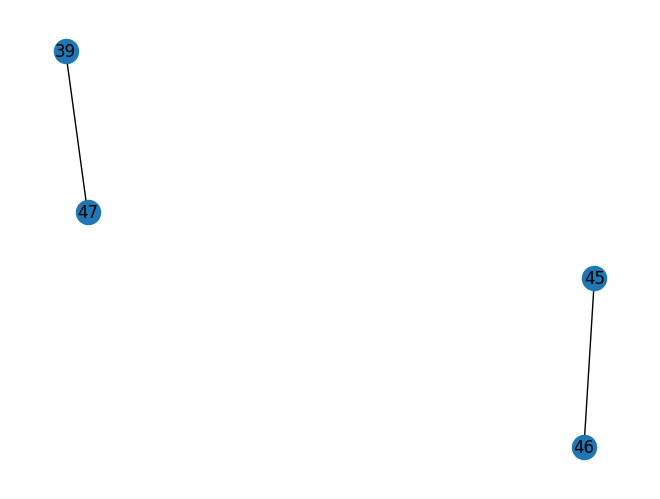

Performing global features query
Done with edge_df: 0.0007522106170654297
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    4.310532               0.055858                   0.0   
1  45  46     17.97   23.639346               0.117949                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False                          False  
1                0                       False                          False  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    4.310532               0.055858                   0.0   
1  45  46     17.97   23.639346               0.117949                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_pa

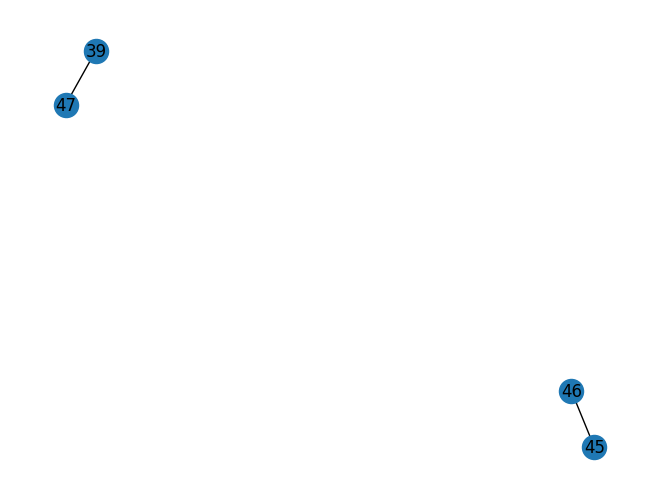

Performing node features query
Done with edge_df: 0.0005929470062255859
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    4.310532               0.055858                   0.0   
1  45  46     17.97   23.639346               0.117949                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                          False   
1                0                       False                          False   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    4.310532               0.055858                   0.0   
1  45  46     17.97   23.639346               0.117949       

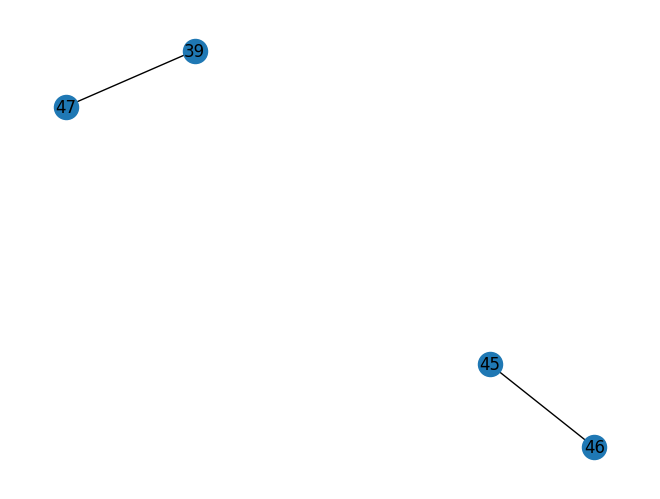

for upstream node 46, winning_node = 45, error_branches = [39 47]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (176.78073002801082) less than width_min(250)
Current node skip distance was 1506.165582874341 but max skip distance was 1506.165582874341
Current node skip distance was 1450.4508458210582 but max skip distance was 1450.4508458210582
Current node skip distance was 2014.7403094353122 but max skip distance was 2014.7403094353122
Current node skip distance was 1874.4952927129884 but max skip distance was 2014.7403094353122
Current node skip distance was 1915.3718706738891 but max skip distance was 2052.567859111655
Current node skip distance was 1445.777336920075 but max skip distance was 1468.5371695391739
Current node skip distance was 1494.8142487134844 but max skip distance was 1494.8142487134844
Current node skip distance was 1386.5517768828443 but max skip distance was 1386.5517768828443
Current node skip distance was 1468.5371695391739 but max s

In [185]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [186]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)

No skeletons to stack so returning empty list

Working on compartment basal---
Compartment limb stats = {'n_limbs': 4, 'soma_angle_max': 170.11, 'soma_angle_min': 20.41}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 80.63, 'soma_angle_min': 80.63}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 4, 'soma_angle_max': 170.11, 'soma_angle_min': 20.41}


# Plotting the final neuron

In [187]:
from neurd import synapse_utils as syu

In [188]:
synapse_df = syu.synapse_df(neuron_obj_proof)
synapse_df["label"].unique()

array(['soma', 'limb_branch', 'mesh_errored'], dtype=object)

In [190]:
synapse_df

,label,limb_idx,branch_idx,compartment,syn_type,syn_id,volume,endpoints_dist,upstream_dist,downstream_dist,coordinate,closest_sk_coordinate,closest_face_idx,closest_branch_face_idx,closest_face_dist,closest_face_coordinate,soma_distance,soma_distance_euclidean,head_neck_shaft,limb_branch
0,soma,-1,NaN,soma,postsyn,478881248,316,"[0.0, 0.0]",0.0,0.0,"[1487008, 587528, 1096120]","[1486992.3333333333, 587452.3666666667, 109616...",158169.0,NaN,87.919540,"[1486992.3333333333, 587452.3666666667, 109616...",-2.0,None,-1.0,L-1_-1
1,soma,-1,NaN,soma,postsyn,482547007,500,"[0.0, 0.0]",0.0,0.0,"[1488952, 591388, 1104720]","[1488993.0, 591347.4666666667, 1104759.0]",167120.0,NaN,69.605683,"[1488993.0, 591347.4666666667, 1104759.0]",-2.0,None,-1.0,L-1_-1
2,soma,-1,NaN,soma,postsyn,482546961,3788,"[0.0, 0.0]",0.0,0.0,"[1488744, 593992, 1102280]","[1488763.6666666667, 593939.5, 1102242.6666666...",173200.0,NaN,67.355813,"[1488763.6666666667, 593939.5, 1102242.6666666...",-2.0,None,-1.0,L-1_-1
3,soma,-1,NaN,soma,postsyn,482547009,4436,"[0.0, 0.0]",0.0,0.0,"[1489052, 592864, 1103760]","[1489050.6666666667, 592910.0, 1103734.6666666...",175900.0,NaN,52.531472,"[1489050.6666666667, 592910.0, 1103734.6666666...",-2.0,None,-1.0,L-1_-1
4,soma,-1,NaN,soma,postsyn,482547105,1524,"[0.0, 0.0]",0.0,0.0,"[1489712, 592160, 1104280]","[1489769.6666666667, 592196.5333333333, 110422...",175474.0,NaN,86.834555,"[1489769.6666666667, 592196.5333333333, 110422...",-2.0,None,-1.0,L-1_-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,mesh_errored,-1,NaN,error,postsyn,482468881,6112,None,NaN,NaN,"[1489376, 594488, 1092360]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1
961,mesh_errored,-1,NaN,error,postsyn,483712349,17880,None,NaN,NaN,"[1501720, 609480, 1075880]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1
962,mesh_errored,-1,NaN,error,postsyn,492052366,8680,None,NaN,NaN,"[1524840, 622592, 1056880]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1
963,mesh_errored,-1,NaN,error,postsyn,486032429,2244,None,NaN,NaN,"[1492720, 571480, 1029520]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1


In [147]:
from python_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [192]:
syu.plot_synapses(neuron_obj_proof)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [193]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

# of error synapses = 408

 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [149]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

# of valid synapses = 556

 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [195]:
nviz.plot_compartments(neuron_obj_proof)


 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

apical:blue
apical_shaft:aqua
apical_tuft:purple
basal:yellow
axon:red
oblique:green


Unlabeled: transparent green


In [198]:
syn_df = syu.synapse_df(neuron_obj_proof)
syn_df

[autoreload of trimesh.path.exchange.svg_io failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 451, in superreload
    if not append_obj(module, old_objects, name, obj):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 419, in append_obj
    in_module = hasattr(obj, "__module__") and obj.__module__ == module.__name__
  File "/usr/local/lib/python3.8/dist-packages/trimesh/exceptions.py", line 30, in __getattribute__
    raise super(ExceptionWrapper, self).__getattribute__('exception')
NameError: name 'ExceptionWrapper' is not defined
]
[autoreload of trimesh.visual.gloss failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(

,label,limb_idx,branch_idx,compartment,syn_type,syn_id,volume,endpoints_dist,upstream_dist,downstream_dist,coordinate,closest_sk_coordinate,closest_face_idx,closest_branch_face_idx,closest_face_dist,closest_face_coordinate,soma_distance,soma_distance_euclidean,head_neck_shaft,limb_branch
0,soma,-1,NaN,soma,postsyn,478881248,316,"[0.0, 0.0]",0.0,0.0,"[1487008, 587528, 1096120]","[1486992.3333333333, 587452.3666666667, 109616...",158169.0,NaN,87.919540,"[1486992.3333333333, 587452.3666666667, 109616...",-2.0,None,-1.0,L-1_-1
1,soma,-1,NaN,soma,postsyn,482547007,500,"[0.0, 0.0]",0.0,0.0,"[1488952, 591388, 1104720]","[1488993.0, 591347.4666666667, 1104759.0]",167120.0,NaN,69.605683,"[1488993.0, 591347.4666666667, 1104759.0]",-2.0,None,-1.0,L-1_-1
2,soma,-1,NaN,soma,postsyn,482546961,3788,"[0.0, 0.0]",0.0,0.0,"[1488744, 593992, 1102280]","[1488763.6666666667, 593939.5, 1102242.6666666...",173200.0,NaN,67.355813,"[1488763.6666666667, 593939.5, 1102242.6666666...",-2.0,None,-1.0,L-1_-1
3,soma,-1,NaN,soma,postsyn,482547009,4436,"[0.0, 0.0]",0.0,0.0,"[1489052, 592864, 1103760]","[1489050.6666666667, 592910.0, 1103734.6666666...",175900.0,NaN,52.531472,"[1489050.6666666667, 592910.0, 1103734.6666666...",-2.0,None,-1.0,L-1_-1
4,soma,-1,NaN,soma,postsyn,482547105,1524,"[0.0, 0.0]",0.0,0.0,"[1489712, 592160, 1104280]","[1489769.6666666667, 592196.5333333333, 110422...",175474.0,NaN,86.834555,"[1489769.6666666667, 592196.5333333333, 110422...",-2.0,None,-1.0,L-1_-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,mesh_errored,-1,NaN,error,postsyn,482468881,6112,None,NaN,NaN,"[1489376, 594488, 1092360]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1
961,mesh_errored,-1,NaN,error,postsyn,483712349,17880,None,NaN,NaN,"[1501720, 609480, 1075880]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1
962,mesh_errored,-1,NaN,error,postsyn,492052366,8680,None,NaN,NaN,"[1524840, 622592, 1056880]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1
963,mesh_errored,-1,NaN,error,postsyn,486032429,2244,None,NaN,NaN,"[1492720, 571480, 1029520]",None,NaN,NaN,NaN,None,-1.0,None,NaN,L-1_-1


In [200]:
syn_df.columns

Index(['label', 'limb_idx', 'branch_idx', 'compartment', 'syn_type', 'syn_id',
       'volume', 'endpoints_dist', 'upstream_dist', 'downstream_dist',
       'coordinate', 'closest_sk_coordinate', 'closest_face_idx',
       'closest_branch_face_idx', 'closest_face_dist',
       'closest_face_coordinate', 'soma_distance', 'soma_distance_euclidean',
       'head_neck_shaft', 'limb_branch'],
      dtype='object')